In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100-popular-movies-from-2003-to-2022-imdb/movies.csv


# Business Data Challenge
Companies in the entertainment industry nowadays face a substantial risk: Large upfront investments are often necessary for movie productions, but only 20% of movies end up being profitable (Forbes, 2019). Indicators are needed that help companies estimate the financial of their movie, make more informed decisions and so are able to mitigate the risk of loosing money on a movie project. To enhance the movie production company's chances of producing profitable films the use of data analytics is crucial . By analyzing historical data on movie sucess, trends, correlations, and patterns can be uncovered and used  to make informed decisions regarding genre, casting, or marketing strategies. Utilizing machine learning algorithms, our predictive models will be able to forecast potential box office performance and allow to optimize resources and achieve maximum profitability.


# Load Data Set

In [2]:
df = pd.read_csv('/kaggle/input/top-100-popular-movies-from-2003-to-2022-imdb/movies.csv')

# Inspect Data

In [3]:
# overview
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [4]:
# overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [5]:
# list all columns
df.columns

Index(['Title', 'Rating', 'Year', 'Month', 'Certificate', 'Runtime',
       'Directors', 'Stars', 'Genre', 'Filming_location', 'Budget', 'Income',
       'Country_of_origin'],
      dtype='object')

In [6]:
# check duplicates
df.loc[df.duplicated(keep=False)]

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin


In [7]:
# check unique values
df.nunique()

Title                1989
Rating                 62
Year                   20
Month                  14
Certificate            12
Runtime               113
Directors            1082
Stars                1990
Genre                 244
Filming_location       97
Budget                305
Income               1856
Country_of_origin     406
dtype: int64

In [8]:
df['Budget'].unique()

array(['$350,000,000 ', '$35,000,000 ', '$85,900,000 ', 'Unknown',
       '$12,000,000 ', '$120,000,000 ', '$80,000,000 ', '$20,000,000 ',
       '$10,000,000 ', '$40,000,000 ', '$78,000,000 ', '$1,000,000 ',
       '$16,000,000 ', '$195,000,000 ', '$100,000,000 ', '$250,000,000 ',
       '€ 10,000,000', '$25,000,000 ', '$3,000,000 ', '$150,000,000 ',
       '$170,000,000 ', '$17,000,000 ', '$200,000,000 ', '$4,500,000 ',
       '$32,000,000 ', '$60,000,000 ', '$72,000,000 ', '$2,000,000 ',
       '$68,000,000 ', '$24,000,000 ', '$9,000,000 ', '$50,000,000 ',
       '$90,000,000 ', '$250,000 ', '$85,000,000 ', '$8,000,000 ',
       '₹3,500,000,000', '$22,000,000 ', '€ 7,500,000', '$165,000,000 ',
       'CA$15,000', '$30,000,000 ', '$185,000,000 ', '$75,000,000 ',
       '$18,000,000 ', '$55,000,000 ', '$43,000,000 ', '€ 5,000,000',
       '$300,000,000 ', 'SEK\xa019,000,000', '$190,000,000 ',
       '$15,000,000 ', '$160,000,000 ', '$70,000,000 ', '$24,350,000 ',
       '$820,000 ', '

In [9]:
df['Runtime'].unique()

array(['192', '117', '127', '114', '102', '132', '134', '112', '151',
       '107', '188', '105', '131', '125', '126', '98', '101', '161',
       '140', '147', '139', '97', '154', '123', '130', '115', '176', '87',
       '129', '104', '99', '93', '137', '128', '100', '148', '158', '96',
       '86', '108', '124', '89', '111', '103', '135', '95', '119', '136',
       '77', '118', '138', '159', '122', '187', '146', '121', '91', '116',
       '167', '113', '110', '141', '92', '155', '163', '106', '133', '88',
       '150', '156', '242', '109', '143', '152', '83', '120', '90', '144',
       '179', '142', '160', '94', '85', '181', '209', '169', '84', '149',
       '78', '75', '164', '70', '145', '79', '82', '168', '165',
       'Unknown', '153', '180', '50', '157', '172', '80', '162', '170',
       '166', '81', '191', '71', '175', '201', '178'], dtype=object)

In [10]:
df['Certificate'].unique()

array(['PG-13', 'PG', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'TV-Y7',
       'Not Rated', nan, 'NC-17', 'TV-G', 'Unrated', 'G'], dtype=object)

# Data Cleaning

In [11]:
df.drop(['Title'],axis=1,inplace=True)

In [12]:
# percentage of nan values by column
df.isna().sum()

Rating                1
Year                  0
Month                 0
Certificate          34
Runtime               0
Directors             0
Stars                 0
Genre                 0
Filming_location      0
Budget                0
Income                0
Country_of_origin     0
dtype: int64

In [13]:
# updates the 'Certificate' value for the selected rows 
# with the corresponding mode value associated with the first genre
invalid_certificates = ['Unrated', 'Not Rated', np.nan]
genre_mode = df.groupby(df['Genre'].str.split(',').str[0])['Certificate'].transform(lambda x: x.mode().iloc[0])
mask = df['Certificate'].isin(invalid_certificates)
df.loc[mask,'Certificate'] = genre_mode[mask]


In [14]:
# percentage of missing values recorded as "unknown"
def check_unknowns():
    for col in df.columns:
        unknown_percent = (df[col] == 'Unknown').sum() / len(df) * 100
        print(f'{col}: {unknown_percent:.2f}%')
check_unknowns()

Rating: 0.00%
Year: 0.00%
Month: 0.00%
Certificate: 0.00%
Runtime: 0.10%
Directors: 0.00%
Stars: 0.00%
Genre: 0.00%
Filming_location: 3.80%
Budget: 15.20%
Income: 7.25%
Country_of_origin: 0.00%


In [15]:
# turn all unknown values into 0s for later processing
for col in ['Budget', 'Income', 'Runtime']:
    df[col].replace('Unknown', '0', inplace=True)

In [16]:
# conversion values 03/11/23
conversion_dict = {
    '$': 1.0,
    '€': 1.07,
    '£': 1.21,
    '₩': 0.00078,
    'C': 0.73,
    '₹': 0.012,
    '¥': 0.0075,
    'A': 0.68,
    'S': 0.095,
    'D': 0.14,
    'N': 0.10 
}

In [17]:
import re
# strip each value of its symbol and convert the value
# based on the symbol as per the dictionary
for col in ['Budget', 'Income']:
    df[col] = df[col].apply(lambda x: 
                                  int(re.sub('[^0-9]', '', x)) * conversion_dict.get(x[0], 1))

In [18]:
df['Runtime'] = df['Runtime'].astype(int)
# turn all unknown values, 0s, into nans 
df.loc[:, ['Budget', 
           'Income', 
           'Runtime']] = df.loc[:, ['Budget', 
                                    'Income', 
                                    'Runtime']].replace(0, np.nan)

In [19]:
# fill nan values for runtime, budget, income,
df['Runtime'].dropna(inplace=True)
df['Income'].fillna(df['Income'].median(),inplace=True)
df['Budget'].fillna(df['Budget'].median(),inplace=True)

In [20]:
df.isna().sum()

Rating               1
Year                 0
Month                0
Certificate          0
Runtime              2
Directors            0
Stars                0
Genre                0
Filming_location     0
Budget               0
Income               0
Country_of_origin    0
dtype: int64

In [21]:
df.loc[df['Runtime'].isnull(), :]

,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
848,2.1,2014,2014,R,NaN,Enzo Zelocchi,"Enzo Zelocchi, Miryam Negrin, Paul Gregory, Ma...","Comedy, Drama, Thriller",USA,250000.0,90842646.0,United States
1249,3.2,2010,September,PG-13,NaN,Enzo Zelocchi,"Enzo Zelocchi, Charlotte Labadie, David M Edel...","Romance, Drama, Family",Unknown,10.0,90842646.0,United States


In [22]:
df.loc[df['Rating'].isnull(), :]

,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
85,NaN,2022,January,PG-13,126.0,Marc Forster,"Tom Hanks, Rachel Keller, Manuel Garcia Rulfo,...","Comedy, Drama",USA,40000000.0,90842646.0,"Sweden, United States"


In [23]:
df.drop(index=[85, 1249, 848], inplace=True)

df.reset_index(drop=True, inplace=True)

In [24]:
# fill unknown values with most common
df['Filming_location'] = df['Filming_location'].replace('Unknown', 'USA')

In [25]:
# drop the two rows with wrong month value
df = df.drop(df[df['Month'] == '2014'].index)
df = df.drop(df[df['Month'] == '2008'].index)

In [26]:
# years from string to integers
df['Year'] = df['Year'].astype(int)

In [27]:
# check if all unkowns have been taken care of
check_unknowns()

Rating: 0.00%
Year: 0.00%
Month: 0.00%
Certificate: 0.00%
Runtime: 0.00%
Directors: 0.00%
Stars: 0.00%
Genre: 0.00%
Filming_location: 0.00%
Budget: 0.00%
Income: 0.00%
Country_of_origin: 0.00%


In [28]:
# check dataframe after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 0 to 1996
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             1996 non-null   float64
 1   Year               1996 non-null   int64  
 2   Month              1996 non-null   object 
 3   Certificate        1996 non-null   object 
 4   Runtime            1996 non-null   float64
 5   Directors          1996 non-null   object 
 6   Stars              1996 non-null   object 
 7   Genre              1996 non-null   object 
 8   Filming_location   1996 non-null   object 
 9   Budget             1996 non-null   float64
 10  Income             1996 non-null   float64
 11  Country_of_origin  1996 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 202.7+ KB


# Exploratory Data Analysis

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1996.0,6.665932e+00,9.030395e-01,1.90,6.175000e+00,6.7,7.300000e+00,9.000000e+00
Year,1996.0,2.012498e+03,5.768334e+00,2003.00,2.007000e+03,2012.5,2.017250e+03,2.022000e+03
Runtime,1996.0,1.132179e+02,1.961313e+01,50.00,9.900000e+01,110.0,1.240000e+02,2.420000e+02
Budget,1996.0,5.804498e+07,5.647101e+07,11.77,2.000000e+07,40000000.0,7.500000e+07,3.560000e+08
Income,1996.0,1.818519e+08,2.685744e+08,305.00,2.956873e+07,90842646.0,2.084946e+08,2.922918e+09


In [30]:
# create a Profit column
df['Profit'] = (df['Income'] - df['Budget']).apply(lambda x: round(x, -6))

# Create a new column for ROI
df['ROI'] = (df['Income'] - df['Budget']) / df['Budget']

In [31]:
df['ROI'].describe()

count      1996.000000
mean        242.325442
std        7316.282702
min          -0.999992
25%           0.164218
50%           1.384460
75%           3.353567
max      282997.897196
Name: ROI, dtype: float64

In [32]:
# remove Budget values less than 1000 as those are likely typos or extreme outliers at best
df = df[df['Budget'] > 1000]

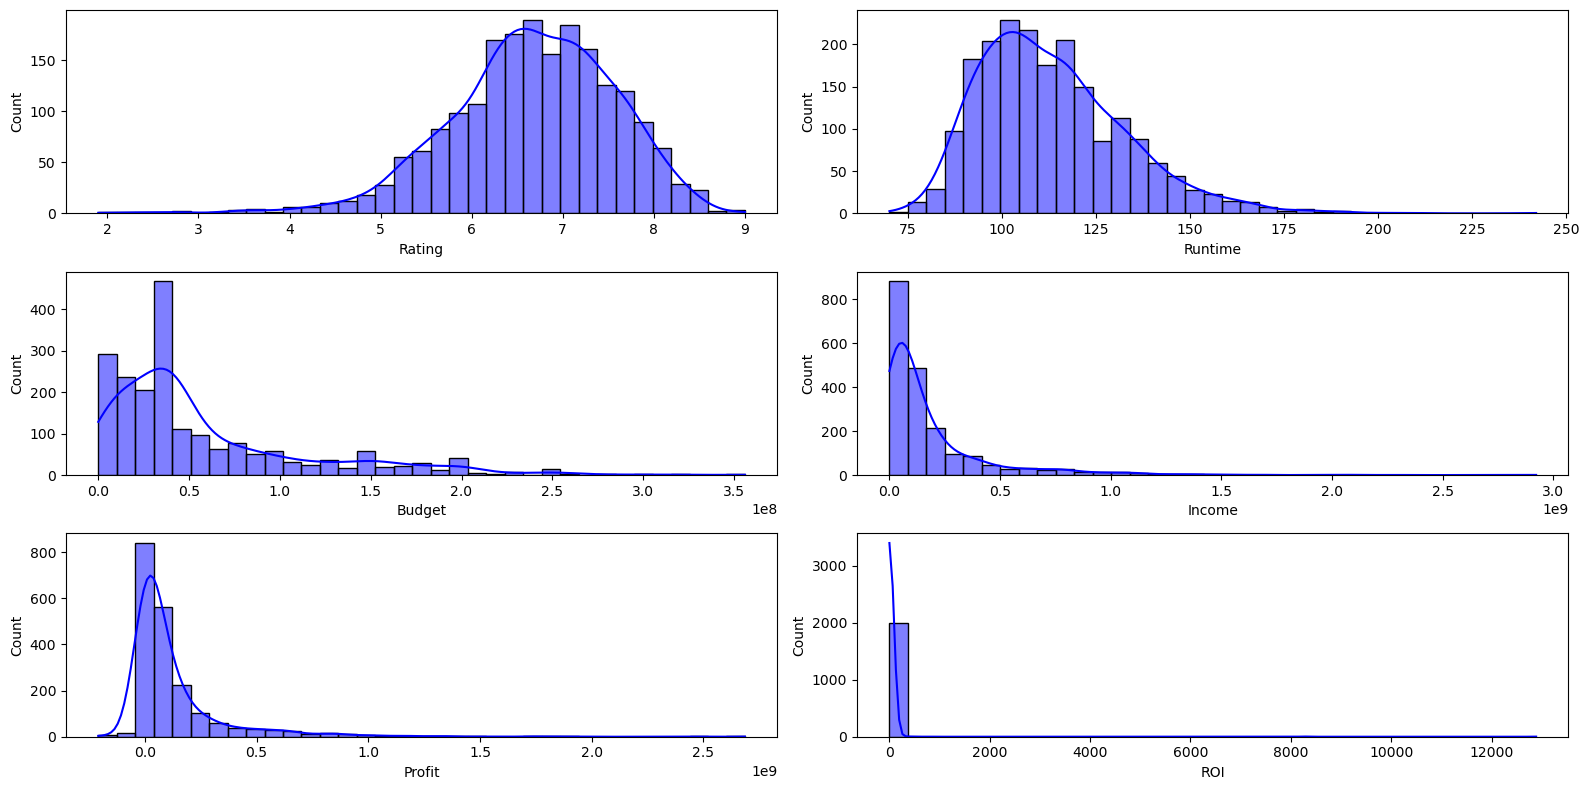

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot histogram for all numerical values
num_values = ['Rating', 'Runtime', 'Budget', 'Income', 'Profit', 'ROI']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))

for i, col in enumerate(num_values):
    sns.histplot(data=df,
                 x=col,
                 bins=35,
                 kde=True,
                 color='blue',
                  ax=axs[i//2, i%2])
    axs[i//2, i%2].set_xlabel(col)
    
# axs[2,1].axis('off')

plt.tight_layout()
plt.show()


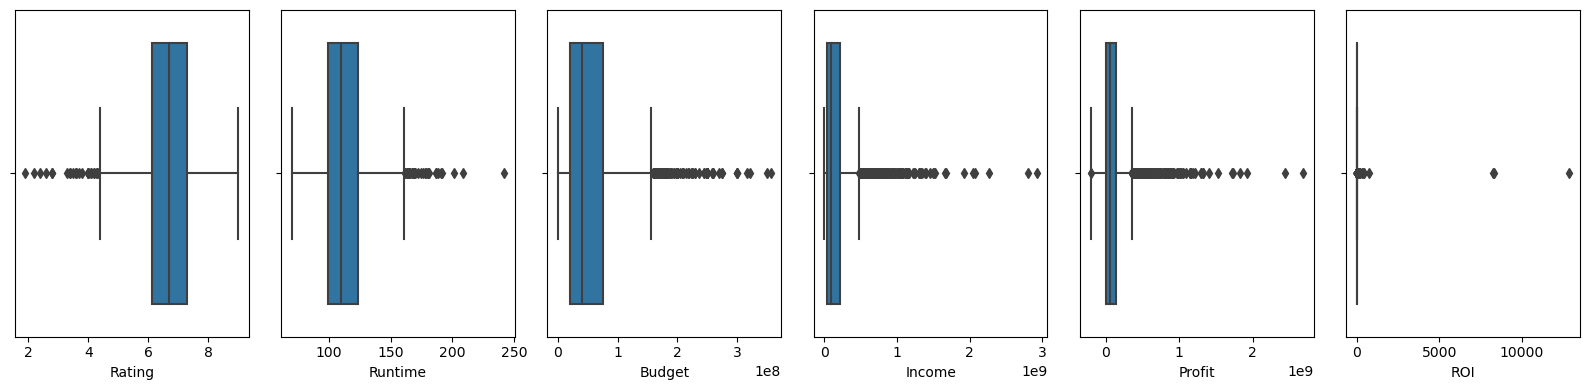

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=len(num_values), figsize=(16, 4))

for i, col in enumerate(num_values):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

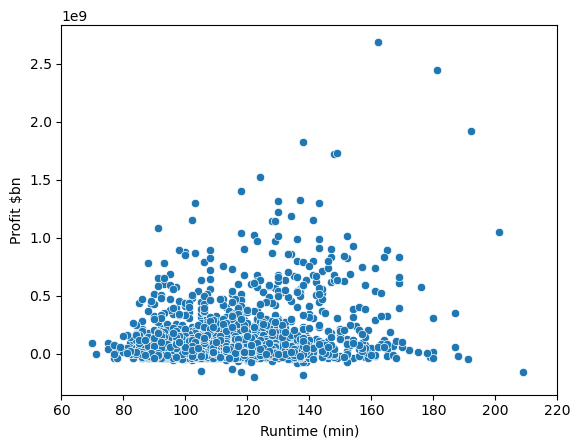

In [35]:
# Draw a categorical scatterplot to show each observation
ax = sns.scatterplot(data=df, x='Runtime', y='Profit')
ax.set(ylabel='Profit $bn')
ax.set(xlabel='Runtime (min)')
ax.set_xlim(60, 220)
plt.show

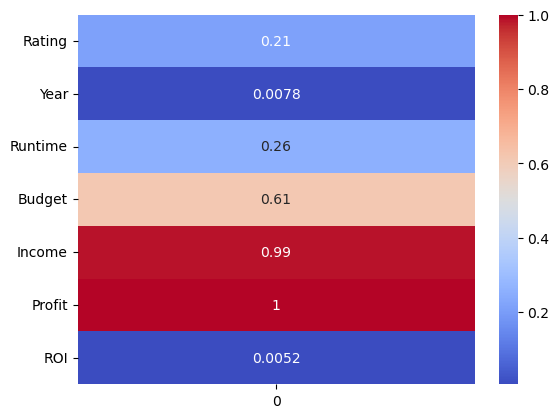

In [36]:
# calculate the correlation coefficients
corr_matrix = df.corrwith(df['Profit'])

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()

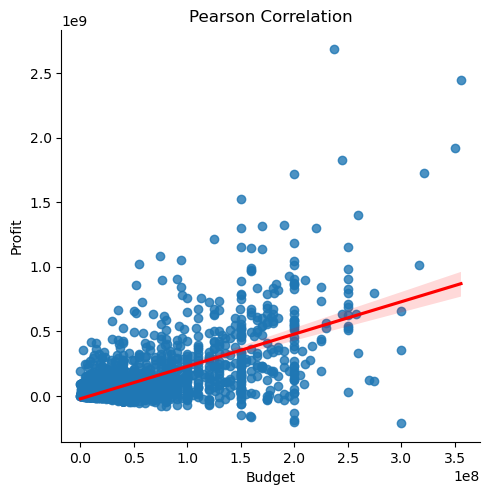

In [37]:
# create a scatter plot with a regression line
sns.lmplot(x='Budget', y='Profit', data=df, line_kws={'color': 'red'})
plt.title('Pearson Correlation')
plt.show()

In [38]:
def most_freq(col, n):
    tmp_df = df[[col]].copy()
    tmp_df[col] = [x.split(', ') for x in tmp_df[col]]
    most_freq_elements = tmp_df[col].explode().value_counts().index[:n].tolist()
    return most_freq_elements

In [39]:
top_genre = most_freq('Genre', 10)
top_stars = most_freq('Stars', 15)
top_directors = most_freq('Directors', 10)
top_country_of_origin = most_freq('Country_of_origin', 10)
top_filming_location = most_freq('Filming_location', 10)

In [40]:
top_elements_dict = {'Stars': top_stars, 'Directors': top_directors, 
                     'Genre': top_genre, 'Country_of_origin': top_country_of_origin, 'Filming_location': top_filming_location}

In [41]:
print('### Top 10 Genre ###\n ', top_genre)
print('\n### Top 15 Stars ###\n ', top_stars)
print('\n### Top 10 Directors ###\n ', top_directors)
print('\n### Top 10 Countries of Origin ###\n ', top_country_of_origin)
print('\n### Top 10 Filming Locations ###\n ', top_filming_location)

### Top 10 Genre ###
  ['Drama', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Mystery', 'Sci-Fi']

### Top 15 Stars ###
  ['Dwayne Johnson', 'Mark Wahlberg', 'Ryan Reynolds', 'Matt Damon', 'Amy Adams', 'Scarlett Johansson', 'Brad Pitt', 'Cate Blanchett', 'Samuel L Jackson', 'Liam Neeson', 'Tom Hanks', 'Jake Gyllenhaal', 'Colin Farrell', 'Gerard Butler', 'Christian Bale']

### Top 10 Directors ###
  ['Ridley Scott', 'Steven Spielberg', 'Antoine Fuqua', 'Clint Eastwood', 'Shawn Levy', 'Michael Bay', 'Quentin Tarantino', 'Tim Burton', 'Zack Snyder', 'Robert Rodriguez']

### Top 10 Countries of Origin ###
  ['United States', 'United Kingdom', 'Canada', 'France', 'Germany', 'China', 'Japan', 'Australia', 'Spain', 'Italy']

### Top 10 Filming Locations ###
  ['USA', 'Canada', 'UK', 'Australia', 'France', 'Spain', 'Italy', 'New Zealand', 'Germany', 'Mexico']


In [42]:
df['Certificate'].value_counts()

R        945
PG-13    727
PG       229
TV-MA     40
G         22
TV-14     12
TV-PG      9
NC-17      6
TV-G       3
TV-Y7      1
Name: Certificate, dtype: int64

In [43]:
def measure_target(category, top_elements, df, target, measure):
    '''
    Computes the target variable measured by the given category and top elements.

    Parameters:
    category (str): The name of the category to measure by.
    top_elements (list of str): The top elements to measure the target variable for within the category.
    target (str): The name of the target variable to measure.
    measure (str or function): The measure to use to aggregate the target variable. This can be a string
        specifying the name of the function to use (e.g., 'mean', 'median', 'sum'), or a function object
        that takes a Series and returns a scalar.

    Returns:
    dict of {str: float}: A dictionary where each key is an element and the corresponding value is the
        measured target variable for that element.
    '''
    measure_target_top_elements = {}
    for element in top_elements:
        measure_target = df.loc[df[category].str.contains(element), target].agg(measure)
        # add every element's ROI, average, or median Profit rounding to the nearest 100 thousands
        measure_target_top_elements[element] = measure_target #if not pd.isna(measure_target) else -1
        # sort the dictionary in ascending order
        measure_target_top_elements = dict(sorted(measure_target_top_elements.items(),
                                                  key=lambda item: item[1], reverse=True))
    return measure_target_top_elements


def plot_target_by_category(target, measure, categories=None, top_elements_dict=None, y_metric=1e8, y_tick_upper=3.5):
    
    '''
    Plots a bar chart of a target variable measured by category, either for a list of categorical variables or for the top elements
    within each category.
    
    Parameters:
    target (str): The name of the target variable to plot.
    measure (str): The type of measure to use for the target variable (e.g. 'median', 'mean', 'sum', 'count').
    categories (list of str): The names of the categories to plot. Either this or top_elements_dict must be provided.
    top_elements_dict (dict of {str: list of str}): A dictionary where each key is a category and the corresponding value
        is a list of the top elements to plot within that category. Either this or categories must be provided.
    y_metric (float): The scaling factor to use for the y-axis tick labels (default is 1e8).
    y_tick_upper (float): The upper limit of the y-axis tick labels (default is 3.5)
    '''
    
    # Validate input parameters
    if categories is None and top_elements_dict is None:
        raise ValueError('Either "categories" or "top_elements_by_category" argument must be provided.')
    if categories is not None and not isinstance(categories, list):
        raise ValueError('The "categories" argument must be a list.')
    if top_elements_dict is not None and not isinstance(top_elements_dict, dict):
        raise ValueError('The "top_elements_by_category" argument must be a dictionary.')
    if not callable(measure) and not isinstance(measure, str):
        raise ValueError('The "measure" argument must be ea string.')

    if top_elements_dict is not None:
        # Create a dictionary containing the category and a list of x and y values of the top elements
        data_to_plot = {}
        for idx, (category, top_elements) in enumerate(top_elements_dict.items()):
            # Compute the target variable measured by the given category and top elements
            target_measured_top_elements = measure_target(category, top_elements, df, target, measure)
            # Add the category and a tuple of the top elements and their corresponding target values to dict_xy
            x, y = list(target_measured_top_elements.keys()), list(target_measured_top_elements.values())
            data_to_plot[idx] = [category, (x, y)]

    else:
        # Create a dictionary containing the category and a list of x and y values
        data_to_plot = {}
        for idx, category in enumerate(categories):
            target_measured_by_category = df.groupby(category)[target].agg(measure).sort_values(ascending=False)
            # get x and y axis values
            x, y = target_measured_by_category.index, target_measured_by_category.values
            # add x,y as tuple to list
            data_to_plot[idx] = [category, (x, y)]

    # get number of rows dynamically
    num_plots = len(data_to_plot)
    max_cols = 2

    # Calculate number of rows and columns needed
    num_rows = math.ceil(num_plots / max_cols)
    num_cols = math.ceil(num_plots / num_rows)
    
    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(8, 4*num_rows))

    # Check if axs is an ndarray before flattening
    if isinstance(axs, np.ndarray):
        axs = axs.flatten()
    else:
        axs = [axs]
        
    if num_plots % 2 == 1:
        axs[-1].axis('off')
        axs = axs[:-1]  # Remove the last subplot

    # axs[2,1].axis('off')
    
    # Loop through each subplot and create a bar plot
    for i, ax in enumerate(axs):

        # Create the bar plot
        sns.set_style('whitegrid')
        sns.barplot(x=data_to_plot[i][1][0], y=data_to_plot[i][1][1], data=df, ax=ax, palette="Blues_r")

        # Set the x and y axis labels
        ax.set_xlabel(data_to_plot[i][0])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)
        ax.set_ylabel(f'{target} ({measure})')
        ax.set_yticks(ticks=np.arange(0, y_tick_upper, 0.5) * y_metric)
        ax.tick_params(axis='both', which='major', labelsize=9)

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.5, hspace=0.75)

    # Show the plot
    plt.show()


<b>The following plots are based on the median given the skewness of the distribution of the Income variable</b>

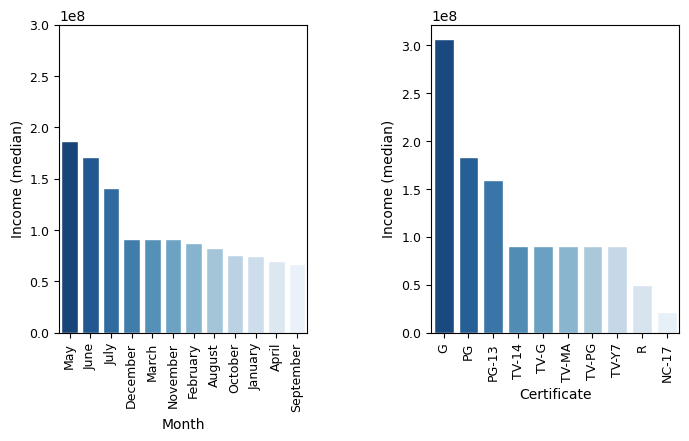

In [44]:
categories=['Month', 'Certificate']

plot_target_by_category('Income', 'median', categories=categories, y_metric=1e8, y_tick_upper=3.5)

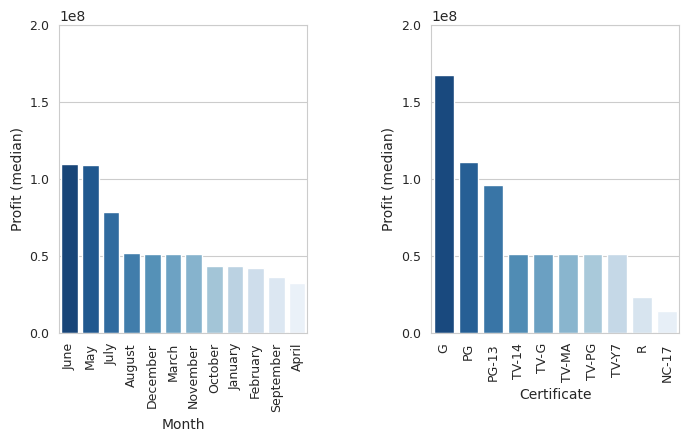

In [45]:
categories=['Month', 'Certificate']

plot_target_by_category('Profit', 'median', categories=categories, y_metric=1e8, y_tick_upper=2.5)

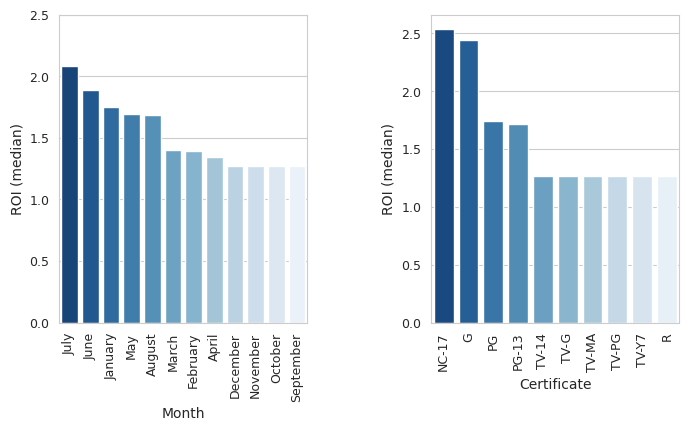

In [46]:
plot_target_by_category('ROI', 'median', categories=categories, y_metric=1, y_tick_upper=3)

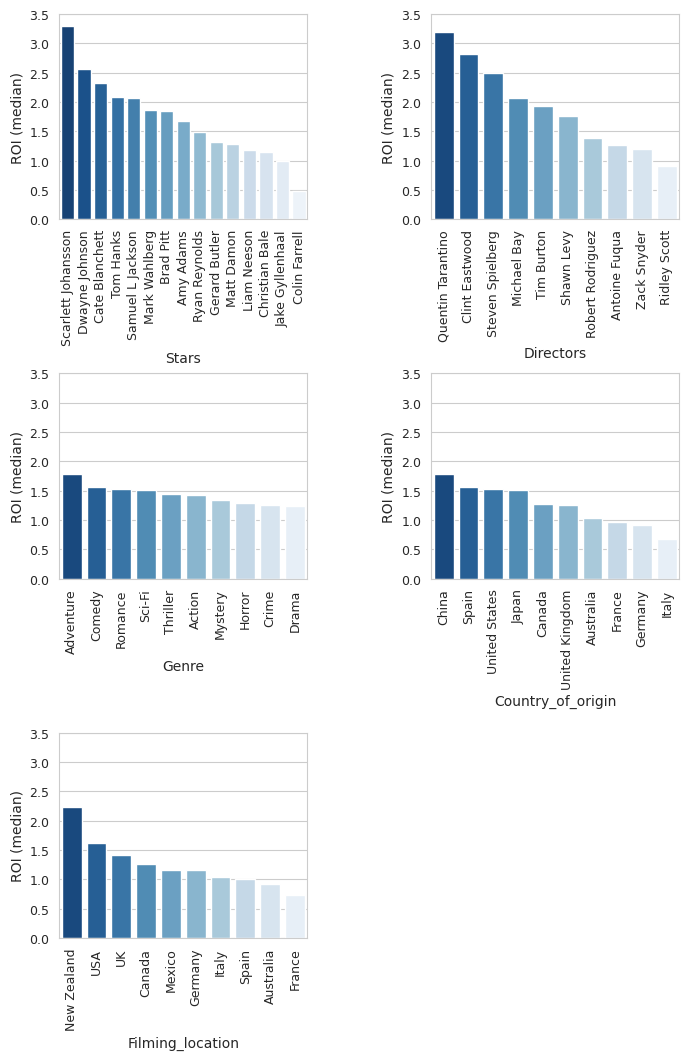

In [47]:
plot_target_by_category('ROI', 'median', top_elements_dict=top_elements_dict, y_metric=1, y_tick_upper=4)

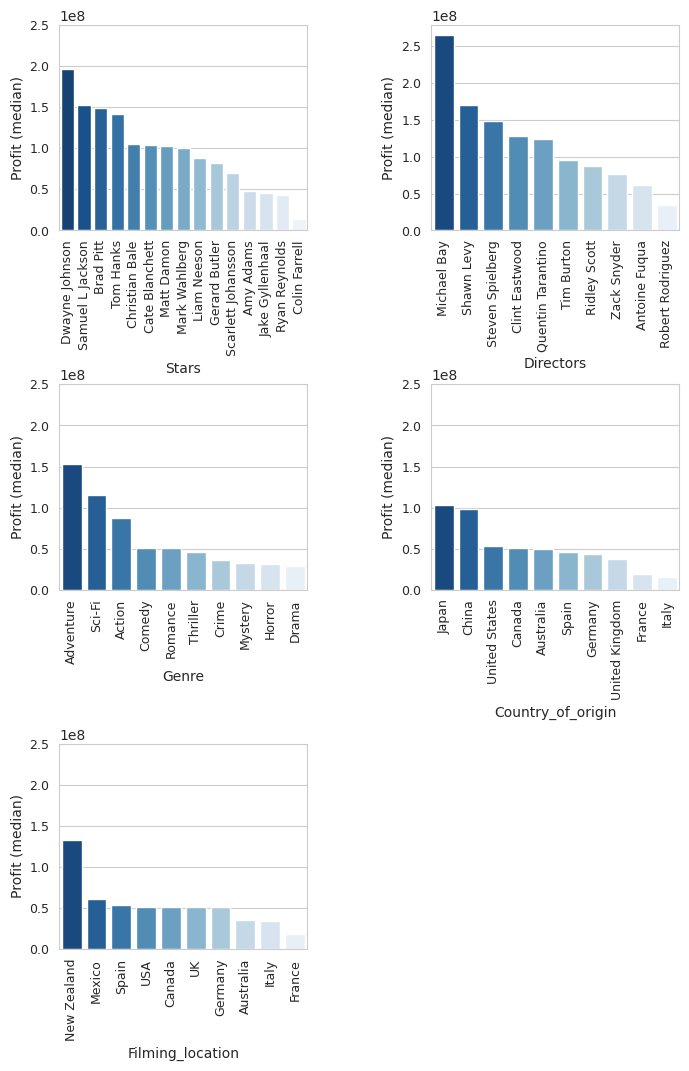

In [48]:
plot_target_by_category('Profit', 'median', top_elements_dict=top_elements_dict, y_metric=1e8, y_tick_upper=3)

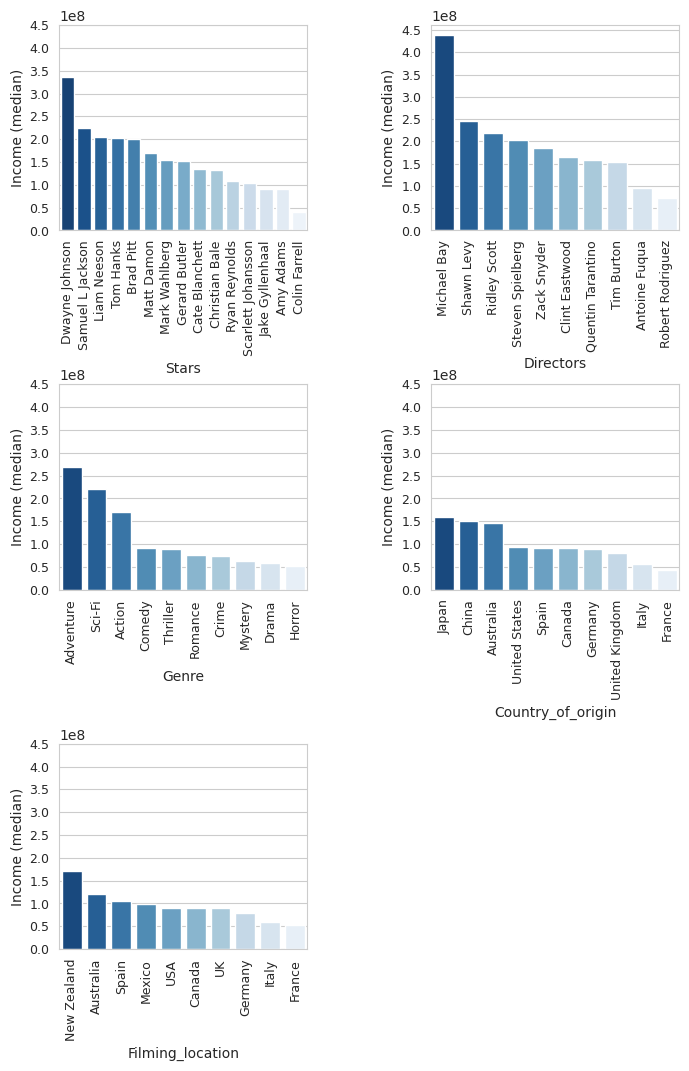

In [49]:
plot_target_by_category('Income', 'median', top_elements_dict=top_elements_dict, y_metric=1e8, y_tick_upper=5)

#### The exploratory data analysis provides multiple insights that can be utilized by movie production companies - the most important ones are:
<ol>
<li>June, May, and July are the most profitable release months. The profitability is at least 50% higher in June and May than in all other months except July. 
<li>Adventure, Sci-Fi and Action are the 'most profitable' genres. 
<li>Dwayne Johnson, Samuel L. Jackson and Brad Pitt  are the 'most profitable' actors to cast.
<li>The rating of the movie is not significantly correlated with  profit. Movies can be very profitable but not be relatively high rated by audiences. 
</ol>

#### Different production companies might want to pursue a different measure of financial performance. Maximizing ROI instead of profit could be more valuable to those. The following are a few of the data analysis insights:
<ol>
<li>January is in the top 3 months if the aim is to maximize ROI, while for profit it's only 8th highest.
<li>Certificate NC-17 generates the highest ROI on average, while it's least effective when the aim is profit.
<li>Having Quentin Tarantino as a director suggests the highest chance at maximizing ROI, while he's only 5th if the aim is profit.
<li>Scarlett Johansson as a star generates the highest ROI on average, while only 11th highest when the aim is profit. 
<li>Adventure, Comedy and Romance are the top 3 genres for maximizing ROI
<li>China, Spain and the United States are the top 3 filming locations for maximizing ROI.
</ol>


In [50]:
def create_bins(column, percentiles, labels):
    
    # check whether the column is numeric or categorical
    if column in df.select_dtypes(exclude='number').columns:

        def extract_counts(column):
            # Split values in column by commas and create a series with a list of values for each row
            star_lists = df[column].str.split(', ')

            # Count the occurrences of each value in the series after exploding the lists
            star_counts = star_lists.explode().value_counts()

            # Calculate the total appearances of all values in each row's list and return as a series
            cast_counts = star_lists.apply(lambda stars: star_counts[stars].sum())
            return cast_counts

        # Extract the counts for the given column
        cast_counts = extract_counts(column)
        
        # compute the count cut offs based on the percentile cut offs 
        cut_offs = cast_counts.quantile(percentiles)
    
    # make the function usable for numerical columns
    else:
    
        cut_offs = df[column].quantile(percentiles)
        
        cast_counts = df[column]

    # Create a list of bin edges based on the count cut offs
    bin_edges = [-float('inf')] + list(cut_offs) + [float('inf')]

    # Create bins using bin edges and labels
    bins = pd.cut(cast_counts, 
                  bins=bin_edges, 
                  labels=labels,
                  include_lowest=True, 
                  duplicates='drop',
                  ordered=False)

    # Add binned column to the original dataframe
    df[f'{column}_class'] = bins


In [51]:
# create the new columns and define the categories
create_bins('Stars', [0.25, 0.5, 0.75, 0.95], ['unknown', 'known', 'well_known', 'famous', 'iconic'])
create_bins('Directors', [0.5, 0.75, 0.97], ['unknown', 'known', 'well_known', 'famous'])
create_bins('Budget', [0.5, 0.75], ['low', 'moderate', 'high'])
create_bins('Runtime', [0.5, 0.95], ['short', 'moderate', 'long'])

### Inspect new column Stars_class & Directors_class

Profit                                                       \
             count          mean           std          min         25%   
Stars_class                                                               
unknown      510.0  5.209216e+07  1.231403e+08  -70000000.0  -5000000.0   
known        527.0  8.548577e+07  1.788172e+08 -186000000.0  -2000000.0   
well_known   481.0  1.646549e+08  2.612742e+08 -150000000.0  13000000.0   
famous       388.0  1.839330e+08  2.579545e+08 -209000000.0  29000000.0   
iconic        88.0  2.825227e+08  4.129427e+08 -160000000.0  43750000.0   

                                                     
                     50%          75%           max  
Stars_class                                          
unknown       22000000.0   62750000.0  1.043000e+09  
known         42000000.0   99000000.0  1.717000e+09  
well_known    67000000.0  196000000.0  1.918000e+09  
famous        98000000.0  249250000.0  2.686000e+09  
iconic       151000000.0  301750000.0  2.442000e+09

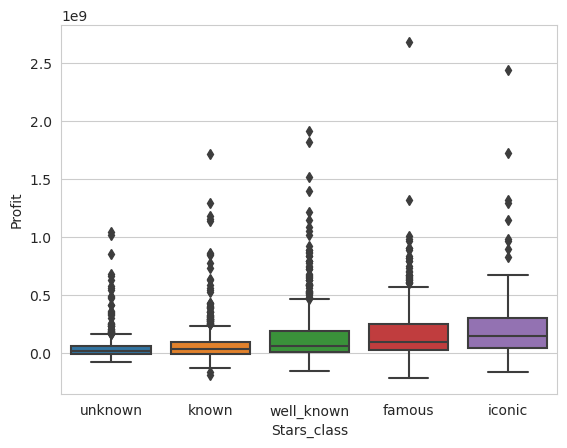

In [52]:
# inspect the new columns
sns.boxplot(data=df, x='Stars_class', y='Profit')
df[['Profit', 'Stars_class']].groupby('Stars_class').describe()

Profit                                                       \
                  count          mean           std          min         25%   
Directors_class                                                                
unknown          1204.0  8.305897e+07  1.904146e+08 -186000000.0  -2000000.0   
known             348.0  1.602471e+08  2.325630e+08 -160000000.0  16250000.0   
well_known        397.0  2.023904e+08  2.681181e+08 -209000000.0  32000000.0   
famous             45.0  2.428222e+08  4.598986e+08 -200000000.0  29000000.0   

                                                         
                         50%          75%           max  
Directors_class                                          
unknown           35000000.0   89250000.0  2.686000e+09  
known             81000000.0  187250000.0  1.319000e+09  
well_known       103000000.0  277000000.0  1.825000e+09  
famous           119000000.0  214000000.0  2.442000e+09

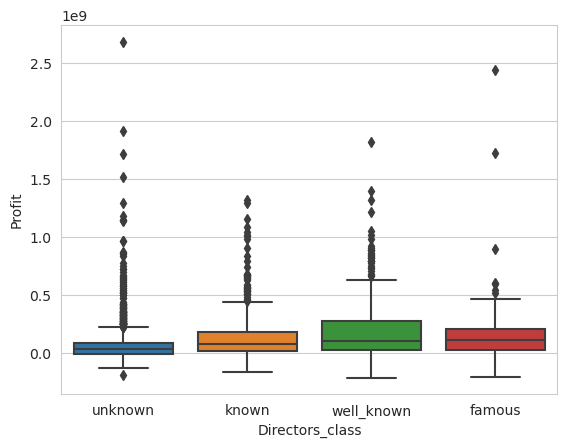

In [53]:
# inspect the new columns
sns.boxplot(data=df, x='Directors_class', y='Profit')
df[['Profit', 'Directors_class']].groupby('Directors_class').describe()

Profit                                                       \
               count          mean           std          min         25%   
Budget_class                                                                
low           1199.0  4.429358e+07  7.806267e+07  -40000000.0  -2000000.0   
moderate       309.0  1.103625e+08  1.519539e+08  -74000000.0  20000000.0   
high           486.0  3.288786e+08  3.610488e+08 -209000000.0  85750000.0   

                                                      
                      50%          75%           max  
Budget_class                                          
low            28000000.0   66000000.0  6.670000e+08  
moderate       73000000.0  147000000.0  1.085000e+09  
high          227500000.0  499000000.0  2.686000e+09

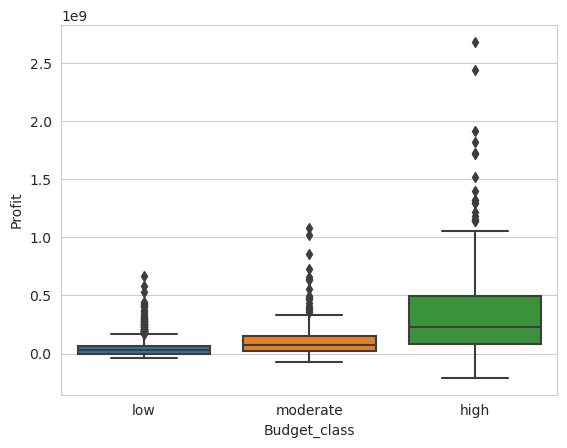

In [54]:
sns.boxplot(data=df, x='Budget_class', y='Profit')
df[['Profit', 'Budget_class']].groupby('Budget_class').describe()

Profit                                                       \
                count          mean           std          min         25%   
Runtime_class                                                                
short          1009.0  8.430327e+07  1.520224e+08 -150000000.0         0.0   
moderate        888.0  1.515822e+08  2.514673e+08 -200000000.0  10000000.0   
long             97.0  2.822474e+08  4.746611e+08 -209000000.0   7000000.0   

                                                      
                      50%          75%           max  
Runtime_class                                         
short          47000000.0  103000000.0  1.300000e+09  
moderate       58000000.0  185250000.0  1.825000e+09  
long           94000000.0  381000000.0  2.686000e+09

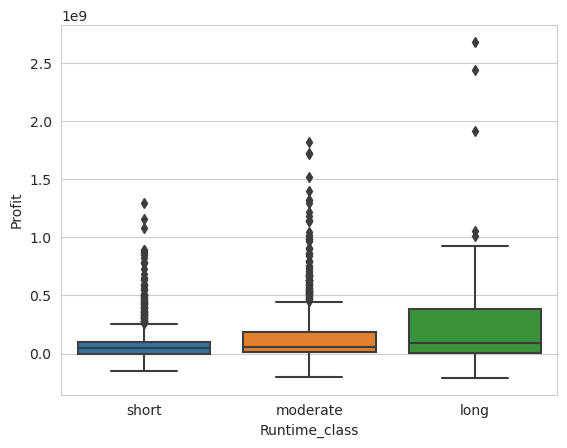

In [55]:
sns.boxplot(data=df, x='Runtime_class', y='Profit')
df[['Profit', 'Runtime_class']].groupby('Runtime_class').describe()

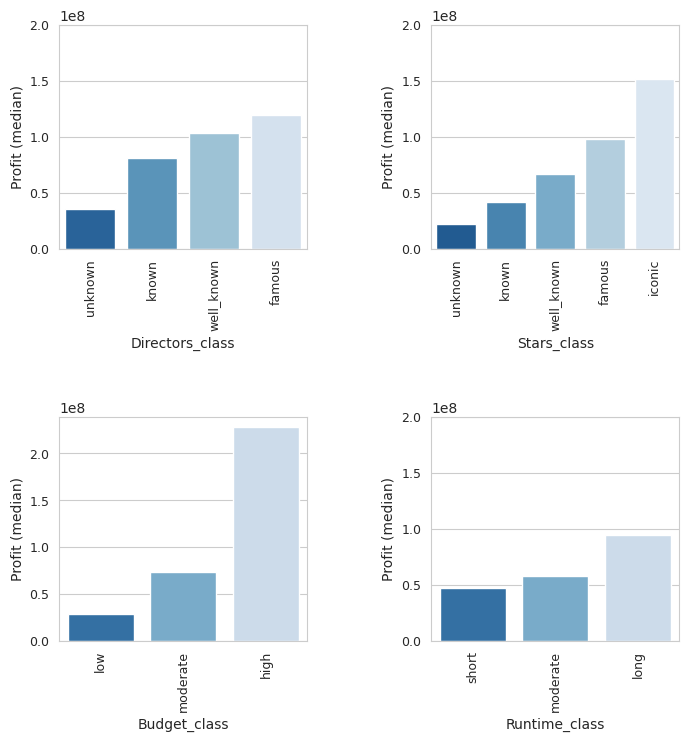

In [56]:
plot_target_by_category('Profit', 'median', categories=['Directors_class', 'Stars_class', 'Budget_class', 'Runtime_class'], y_metric=1e8, y_tick_upper=2.5)

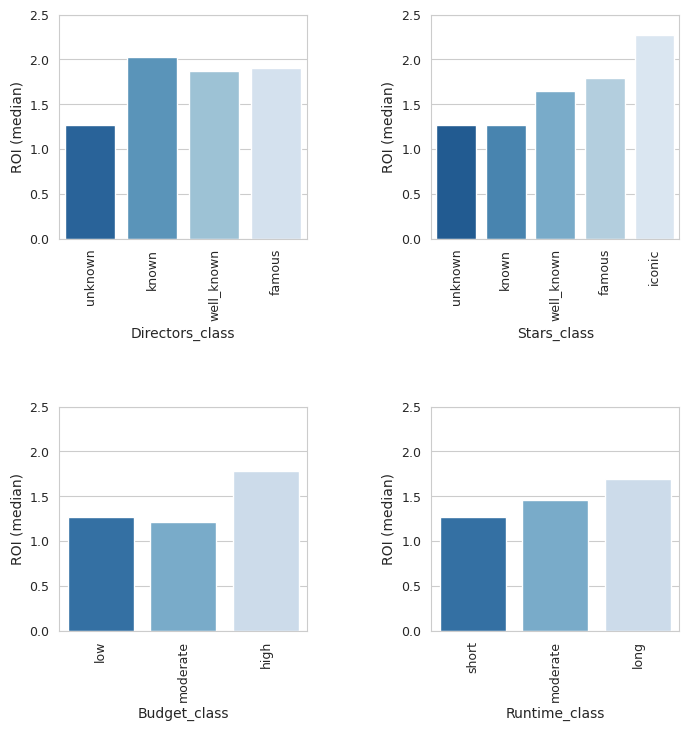

In [57]:
plot_target_by_category('ROI', 'median', categories=['Directors_class', 'Stars_class', 'Budget_class', 'Runtime_class'], y_metric=1, y_tick_upper=3)

<b>Further Business Insights</b>

<ol>
<li>Movies tend to be more profitable with higher-profile actors in them and less profitable with lower-profile actors in them.
<li>Longer movies tend to be more profitable than shorter movies.
<li>Movies without age restriction tend to be more profitable than movies with other certificates.
</ol>

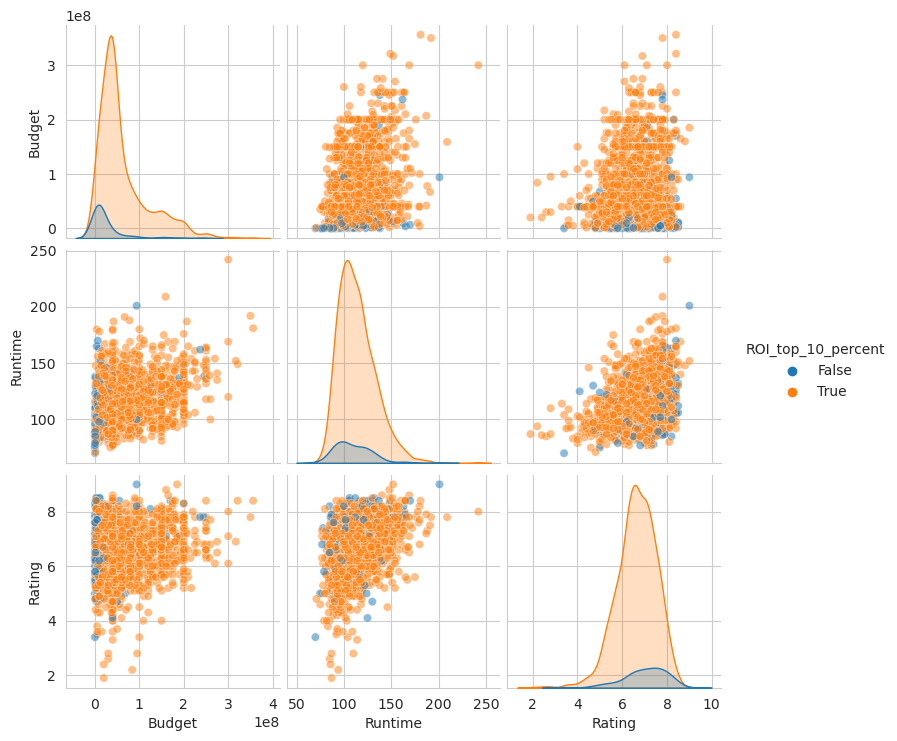

In [58]:
# Create a new column to identify if ROI is below threshold
df['ROI_bottom_25_percent'] = df['ROI'] < df['ROI'].quantile(0.25)
df['ROI_top_10_percent'] = df['ROI'] < df['ROI'].quantile(0.90)

# Select variables to plot
numerics_to_plot = ['Budget', 'Runtime', 'Rating']
categoricals_to_plot = ['Stars_class', 'Directors_class', 'Month']

# Create scatter plot matrix using seaborn with df_below_threshold as hue
sns.pairplot(df, vars=numerics_to_plot, hue='ROI_top_10_percent', plot_kws={'alpha':0.5})
plt.show()

<b> Further interesting finding:</b>
<li>Although Rating is not that important for our analysis because that variable is unknown before the production, it is interesting to notice that it seems as though a low budget regardless of Rating tends to yield a lower Return on Investment

## Practical Implications
<ul>
<li>Release your movie in May, June or July
<li>The impact of user ratings is not significant for profitability. So, don't be scared from trying something new even if you risk lower ratings.
<li>Adventure, sci-fi or action movies are profitable genre
<li>Having The Rock, Samuel L Jackson, or Brad Pitt in your movie would be a homerun
<li>For smaller production companies who focus more on ROI than on profit, the optimal choices can differ and should be chosen accordingly  
</ul>    

# Income Prediction
Predicting income can be insightful when evaluating a movie's financial success because it gives an estimate of the total revenue generated by the movie. While profit and ROI are important metrics for measuring financial success, they are dependent on multiple factors beyond just the revenue generated by the movie. For example, profit depends on the movie's budget, marketing costs, distribution fees, and other expenses.

On the other hand, predicting income provides a straightforward estimate of the revenue generated by the movie, which can be compared to the movie's budget to determine whether it was financially successful. Additionally, predicting income can help in forecasting the potential revenue that a movie might generate in the future.

Overall, predicting income from a movie database can be a useful tool in evaluating a movie's financial success as it provides a clear picture of the movie's revenue generating potential.

## Feature Engineering
Before the models will be trained 'Dummy Variables' are created for 'Categorical Variables'. Furthermore, highly correlated features are excluded (e.g. certain filming locations) and the numerical variables with skewed distributions, including the target variable were log transformed. The dataset is split into 80% training and 20% test data to later evaluate the performance of the model.

In [59]:
df_model = df.copy()

In [60]:
# features that have multiple entries in each cell
columns = ['Genre', 'Country_of_origin', 'Certificate']

# function for most of the remaining columns that need to be changed
for col in columns:
    tmp_df = df_model[col].str.get_dummies(sep=', ').add_prefix(f'{col}_')
    # Drop the first column to interpret coefficients
    tmp_df = tmp_df.iloc[:, 1:]  # Drop the first column
    df_model = pd.concat([df_model, tmp_df], axis=1)
    df_model = df_model.drop(col, axis=1)

In [61]:
for col in ['Stars_class', 'Directors_class', 'Month', 'Filming_location']:
    df_model = pd.get_dummies(df_model, columns=[col], drop_first=True)

In [62]:
to_drop = [ 'Directors', 'Stars', 'Profit', 'ROI', 
           'Rating', 'ROI_top_10_percent', 'ROI_top_10_percent', 
           'ROI_bottom_25_percent', 'Budget_class', 'Runtime_class']
df_model = df_model.drop(to_drop, axis=1)

In [63]:
from sklearn.preprocessing import FunctionTransformer

# Separate the target variable and input features
X = df_model.drop('Income', axis=1)
y = df_model['Income']

# Define a log transformation function
log_transform = FunctionTransformer(np.log1p)

# Apply the log transformation to the X data
X['Budget'] = log_transform.transform(X['Budget'])
X['Runtime'] = log_transform.transform(X['Runtime'])

# Apply the log transformation to the y data
y = log_transform.transform(y)

In [64]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Get correlation between features
corr = X_train.corr()
#sns.heatmap(corr, cmap='coolwarm', annot=True)
#plt.show()

# Potentially drop highly correleated features
cor_matrix = X_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)


print('Highly correlated feature(s) dropped: ', to_drop)

Highly correlated feature(s) dropped:  ['Country_of_origin_Lebanon', 'Country_of_origin_Qatar', 'Country_of_origin_Uruguay', 'Filming_location_Iran', 'Filming_location_Kenya', 'Filming_location_Lebanon', 'Filming_location_Slovenia', 'Filming_location_South Korea']


### Required Imports, Functions, and Tuningparameters

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error
from sklearn import tree

def cv_optimize(clf, parameters, X, y, n_jobs=2, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print('BEST Paramaters: ', gs.best_params_)
    # print(f'BEST cross-validated {score_func}: ', gs.best_score_)
    #print(gs.grid_scores_)
    best = gs.best_estimator_
    return best

def median_absolute_percentage_error(y_test, y_pred):
    return np.median(np.abs((y_test - y_pred) / y_test)) * 100

def print_metrics(clf, X_test, y_test, Y_pred, y_train):
    
    # transform back to original scale to interpret mean error
    Y_pred_exp = np.expm1(Y_pred)
    y_test_exp = np.expm1(y_test)
    y_train_exp = np.expm1(y_train)
    
    # R2 scores on the log transformed data to stabilize the variance due to skewed data
    # for linear regression
    print('Train R2-score: ', format(clf.score(X_train, y_train.values.ravel()), '.2'))
    print('Test R2-score: ', format(clf.score(X_test, y_test.values.ravel()), '.2'))
    r2 = r2_score(y_test.values.ravel(), Y_pred)
    
    # medape = median_absolute_percentage_error(y_test, Y_pred)
    
    #medae = median_absolute_error(y_test.values.ravel(), Y_pred)
    mae = mean_absolute_error(y_test_exp.values.ravel(), Y_pred_exp)
    # mse = mean_squared_error(y_test.values.ravel(), Y_pred)
    mape = mean_absolute_percentage_error(y_test_exp.values.ravel(), Y_pred_exp)

    # Print metrics
    print('Mean Absolute Error:', round(mae, 2)) 
    #print('Median Absolute Error:', round(medae, 2))
    print('R-squared:', round(r2, 2))
    #print('MEDAPE: {:.2f}%'.format(medape))
    print('MAPE: {:.2f}%'.format(mape))

def plot_tree(clf, features):
    
    # Setting dpi = 300 to make image clearer than default
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(60,60), dpi=300)

    tree.plot_tree(clf,
           feature_names=features,
            # string class names must equate to their numerical representation in ascending order 
           class_names=['No', 'Yes'],
           filled=True,
           fontsize=40)
    
lr_params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2]
}


dt_params = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 7],
    'random_state': [0, 42, 100, 200]
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [2, 4, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4, 12, 16],
    'random_state': [0, 42, 100, 200]
}

## OLS Regression 

Investigating variables with significant p-values serves to analyze their importance for predicting income. Their coefficients indicate whether those variables have negative or positive impact on the target variable. Due to the log transformation the scale of the variables may not be absolute, but the coefficients can still be used to understand the direction and magnitude of their impact on the target variable.

In [67]:
import statsmodels.api as sm

# Add a constant column to X_train
X_train_c = sm.add_constant(X_train)

# Fit the OLS model using statsmodels
model = sm.OLS(y_train, X_train_c)
results = model.fit()

# Get the p-values for the coefficients
p_values = results.pvalues[1:]  # Exclude the constant term

# Print the significant variables along with their p-values
significant_vars = p_values[p_values < 0.05]

coef = results.params[1:]

# Print significant variables (p-value < 0.05)
print(coef[p_values < 0.05])


Year                               -0.045142
Runtime                             2.439385
Budget                              0.252611
Genre_Animation                     0.679508
Genre_Drama                        -0.682251
Genre_Romance                       0.299828
Genre_Western                      -1.292025
Country_of_origin_Australia        -0.659255
Country_of_origin_Belgium          -1.044146
Country_of_origin_China             0.624504
Country_of_origin_Cyprus            4.406649
Country_of_origin_Czech Republic   -1.084357
Country_of_origin_Israel           -4.429202
Country_of_origin_Serbia           -8.349648
Country_of_origin_United States     1.213661
Certificate_R                      -1.236016
Stars_class_well_known              0.513749
Stars_class_famous                  0.675317
Stars_class_iconic                  0.730054
Directors_class_known               0.287000
Directors_class_well_known          0.475429
Filming_location_Argentina          2.929810
dtype: flo

# Models
The model selection is based on the business objective, which is to provide insights into the factors that drive a movies financial performance. Interpretable models can provide clear insights into these factors. Moreover, performance metrics, such as mean absolute error, MAPE, and R squared server to evaluate the model.

## Model Linear Regression 

In [68]:
# Create and tune a linear regression model
lr = cv_optimize(LinearRegression(), lr_params, X_train, y_train, score_func="r2")

# fit the model
lr.fit(X_train, y_train)

# Use the model to make predictions on the test set
Y_pred = lr.predict(X_test)

print_metrics(lr, X_test, y_test, Y_pred, y_train)

BEST Paramaters:  {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1}
Train R2-score:  0.47
Test R2-score:  0.32
Mean Absolute Error: 119787696.01
R-squared: 0.32
MAPE: 41.97%


## Model Decision Tree

In [69]:
# Create and tune a DecisionTreeRegressor
dt = cv_optimize(DecisionTreeRegressor(), dt_params, X_train, y_train, score_func="r2")

# fit the model
dt.fit(X_train, y_train)

# Use the model to make predictions on the test set
Y_pred = dt.predict(X_test)

# show results
print_metrics(dt, X_test, y_test, Y_pred, y_train)

# show the decision tree
# plot_tree(dt, X_train.columns.tolist())

BEST Paramaters:  {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 42}
Train R2-score:  0.42
Test R2-score:  0.37
Mean Absolute Error: 101574322.81
R-squared: 0.37
MAPE: 38.67%


## Model Random Forest 

In [70]:
# Create and tune a RandomForestRegressor
rf = cv_optimize(RandomForestRegressor(),rf_params, X_train, y_train, score_func="r2")

# fit the model
rf.fit(X_train, y_train)

# Use the model to make predictions on the test set
Y_pred = rf.predict(X_test)

# show results
print_metrics(rf, X_test, y_test, Y_pred, y_train)

BEST Paramaters:  {'max_depth': 8, 'min_samples_leaf': 16, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 100}
Train R2-score:  0.53
Test R2-score:  0.47
Mean Absolute Error: 88142418.19
R-squared: 0.47
MAPE: 30.06%


#### Feature Importances by Random Forest 

Text(0.5, 0, 'Relative Importance')

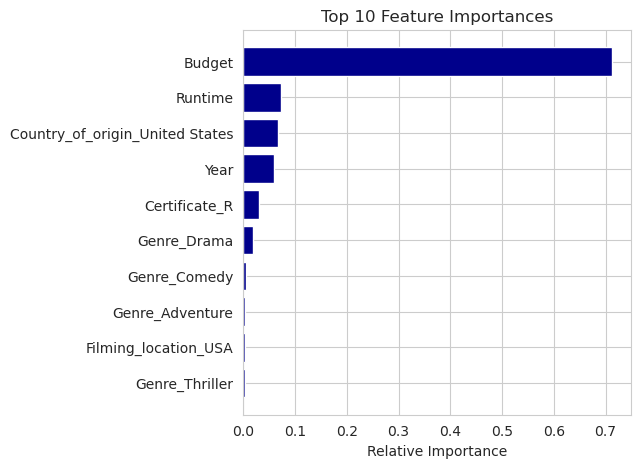

In [71]:
# plot top features importances determined by RandomForest
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # get the top 10 feature indices

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='darkblue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Analysis of the Models
Analyzing Coefficients, features importances as indicated by the Random Forest and looking at the decision Tree, the following features are important for a movies' financial performance: Runtime, Budget, Certificate, Certificate_TV-PG, Stars_class, Filming_location_Serbi, Country_of_origin_USA, and different Genre, including Drama, Western, Animation, and Adventure. These insights also inspired going into some more depth in the Data Analysis insights that are mentioned above.

### Practical Implications
<ul>
<li>As moderate budget movies do not seem to achieve much higher profits than low budget productions, it is not worth to have a medium budget movie, either try to keep the budget low or go big. 

<li>The profitability of a movie seems to be increasing with higher profile actors in them, so logically casting more famous actors promises more financial success.
    
<li>Make movies longer and try to not receive an age restriction 

<li>The best performing model explains about 50% of the variance in the dependent variable, which means that there is still a huge potential to uncover more factors that contribute towards the financial performance of a movie.
</ul>

### Limitations
<ul>
<li>As the best r2 score suggests, there are many other factors influencing the financial performance of these movies. Therefore, the insights should be taken as absolutes. Moreover, the analyisis is based on correlation not causation, a fact often being overshadowed.
<li>The decision Tree is not transformed back to the original scale. So as of now it is only useful for extracting the features that are split on, but not what the cut-offs are for Budget and Runtime.
<li>I might be interesting to further explore the movie titles, which have been left out for this analysis.
<ul>